In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

In [32]:
import numpy as np
from scipy.stats import multivariate_normal

#reference http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/
def initialize(X, k):
    shape = X.shape
    n, m = shape
    phi = np.full(shape=k, fill_value=1/k)
    weights = np.full( shape=shape, fill_value=1/k)
    random_row = np.random.randint(low=0, high=n, size=k)
    mu = [  X[row_index,:] for row_index in random_row ]
    sigma = [ np.cov(X.T) for _ in range(k) ]
    return phi,weights,mu,sigma

def e_step(X,k,phi,weights,mu,sigma):
    # E-Step: update weights and phi holding mu and sigma constant
    weights = predict_proba(X,k,phi,weights,mu,sigma)
    phi = weights.mean(axis=0)
    return phi,weights,mu,sigma

def m_step(X,k,phi,weights,mu,sigma):
    # M-Step: update mu and sigma holding phi and weights constant
    for i in range(k):  
        weight = weights[:, [i]]
        total_weight = weight.sum()
        mu[i] = (X * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(X.T, 
            aweights=(weight/total_weight).flatten(), 
            bias=True)
    return phi,weights,mu,sigma

def fit(X, max_iter, k):
    phi,weights,mu,sigma=initialize(X,k)
    for iteration in range(max_iter):
        phi,weights,mu,sigma=e_step(X,k,phi,weights,mu,sigma)
        phi,weights,mu,sigma=m_step(X,k,phi,weights,mu,sigma)
    return phi,weights,mu,sigma

def predict_proba(X,k,phi,weights,mu,sigma):
    n, m = X.shape
    likelihood = np.zeros( (n, k) )
    for i in range(k):
        distribution = multivariate_normal(
            mean=mu[i], 
            cov=sigma[i])
        likelihood[:,i] = distribution.pdf(X)

    numerator = likelihood * phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights

def predict(X,k,phi,weights,mu,sigma):
    weights = predict_proba(X,k,phi,weights,mu,sigma)
    return np.argmax(weights, axis=1)

Accuracy for k=3 :  0.74


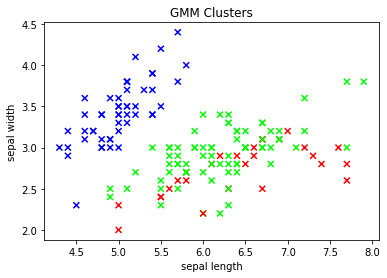

In [33]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
#Fit a model:

#accuracy for k=3 and iterations=10
k=3
phi,weights,mu,sigma = fit(X,10,k)
prediction = predict(X, k,phi,weights,mu,sigma )
#Plot the clusters. Each color is a cluster found by GMM:

def plot_axis_pairs(X, prediction):
    plt.title('GMM Clusters')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.scatter(
        X[:,0], 
        X[:,1], 
        c=prediction, 
        cmap=plt.cm.get_cmap('brg'),
        marker='x')
    plt.show()

print("Accuracy for k=3 : " , np.mean(iris.target == prediction))
plot_axis_pairs(X, prediction)

Accuracy for k=4 :  0.36


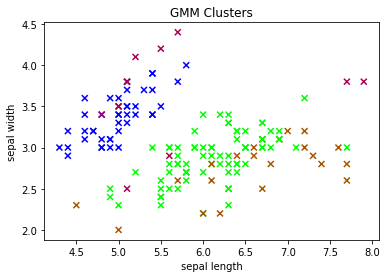

In [34]:
#accuracy for k=4
k=4
phi,weights,mu,sigma = fit(X,10,k)
prediction = predict(X, k,phi,weights,mu,sigma )
#Plot the clusters. Each color is a cluster found by GMM:

def plot_axis_pairs(X, prediction):
    plt.title('GMM Clusters')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.scatter(
        X[:,0], 
        X[:,1], 
        c=prediction, 
        cmap=plt.cm.get_cmap('brg'),
        marker='x')
    plt.show()

print("Accuracy for k=4 : " , np.mean(iris.target == prediction))
plot_axis_pairs(X, prediction)

Accuracy for k=2 :  0.6266666666666667


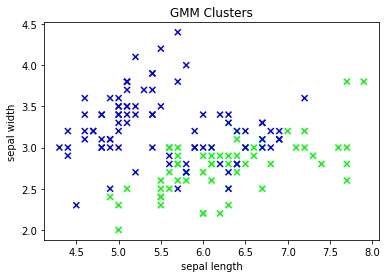

In [35]:
#accuracy for k=2
k=2
phi,weights,mu,sigma = fit(X,10,k)
prediction = predict(X, k,phi,weights,mu,sigma )
#Plot the clusters. Each color is a cluster found by GMM:

def plot_axis_pairs(X, prediction):
    plt.title('GMM Clusters')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.scatter(
        X[:,0], 
        X[:,1], 
        c=prediction, 
        cmap=plt.cm.get_cmap('brg'),
        marker='x')
    plt.show()

print("Accuracy for k=2 : " , np.mean(iris.target == prediction))
plot_axis_pairs(X, prediction)